<a href="https://colab.research.google.com/github/LuisGuillermoRL/Practicas_CDSI/blob/main/C_Pr%C3%A1ctica_Se%C3%B1as_Inerciales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install tsfel


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 KB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 49.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 30.9 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.4.4
    Uninstalling pandas-1.4.4:
      Successfully uninstalled pandas-1.4.4


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import tsfel


In [ ]:
from glob import glob
from google.colab import drive
import os
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cfg = tsfel.get_features_by_domain()

###Ejemplo de un solo archivo

In [ ]:
ruta_prueba = '/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Jhon Doe/Folder_file001_MR.csv'

In [ ]:
prueba = pd.read_csv(ruta_prueba,names=["x","y","z","time"])#,skiprows=113, usecols=[1,2], header=None, na_values=['            '])


Los datos muestran componentes de movimiento en 3 dimensiones, es decir, en las componentes x,y e z. y el tiempo en realizar las actividades mencionadas más abajo.

In [ ]:
prueba

,x,y,z,time
0,-0.027146,1.03220,0.33435,46.147
1,-0.026347,1.04410,0.30773,46.152
2,-0.017418,1.08350,0.27855,46.157
3,-0.008152,1.13880,0.23818,46.162
4,0.004662,1.20600,0.21375,46.167
...,...,...,...,...
1331,0.168010,0.92558,0.13821,52.646
1332,0.184310,0.92558,0.13199,52.651
1333,0.192340,0.93347,0.13287,52.656
1334,0.195430,0.92953,0.16384,52.661


In [ ]:
prueba_arr = prueba.values
prueba_arr

array([[-2.7146e-02,  1.0322e+00,  3.3435e-01,  4.6147e+01],
       [-2.6347e-02,  1.0441e+00,  3.0773e-01,  4.6152e+01],
       [-1.7418e-02,  1.0835e+00,  2.7855e-01,  4.6157e+01],
       ...,
       [ 1.9234e-01,  9.3347e-01,  1.3287e-01,  5.2656e+01],
       [ 1.9543e-01,  9.2953e-01,  1.6384e-01,  5.2661e+01],
       [ 2.1184e-01,  9.3347e-01,  1.5386e-01,  5.2666e+01]])

El Docente a cargo nos comento que la componente en y aparecía desplzada, por lo que daba las siguientes dos recomendaciones:
- Desplzar la componenete en y al "origen" y trabajar con esta.
- Crear otra característica, a saber el vector aceleración, el cuál mencionó que se obtenía con la raíz cuadrada de la suma de las componentes (x,y,z) al cuadrado. $\sqrt{x^2+y^2+z^2}$

Primero ploteamos dos gráficas, una con la componente en Y sin desplazar y en la otra gráfica la componente en Y desplazada.

In [ ]:
#Arcaicamente buscamos plotear la señal pero ya hay métodos para transpuesta y multiplicar
b= np.zeros(shape=(3,1336)) #
for j in [0,1,2]:
  for i in range(len(prueba_arr[...,0])):
    b[j][i]=prueba_arr[...,j][i]*1000
    #el 1000 sólo es para ploterlo, No es necesario en la práctica



In [ ]:
b

array([[ -27.146,  -26.347,  -17.418, ...,  192.34 ,  195.43 ,  211.84 ],
       [1032.2  , 1044.1  , 1083.5  , ...,  933.47 ,  929.53 ,  933.47 ],
       [ 334.35 ,  307.73 ,  278.55 , ...,  132.87 ,  163.84 ,  153.86 ]])

In [ ]:
x_b=prueba_arr[...,3] #Tiempo
x_b

array([46.147, 46.152, 46.157, ..., 52.656, 52.661, 52.666])

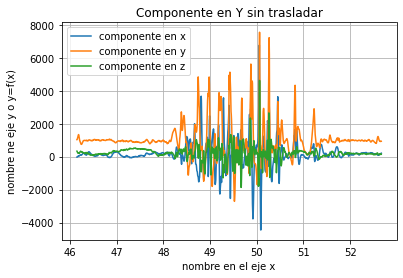

In [ ]:
plt.plot(x_b,b[0],x_b,b[1],x_b,b[2])#,b[1].transpose,b[2].transpose) #Ojo que x_b se repite
plt.legend(["componente en x","componente en y", "componente en z"])

plt.grid(True)
plt.xlabel("nombre en el eje x")
plt.ylabel("nombre ne eje y o y=f(x)")
plt.title("Componente en Y sin trasladar")
plt.show()

In [ ]:
r=np.mean(b[1])
r

984.0341535179641

In [ ]:
yp=b[1]-r
yp

array([ 48.16584648,  60.06584648,  99.46584648, ..., -50.56415352,
       -54.50415352, -50.56415352])

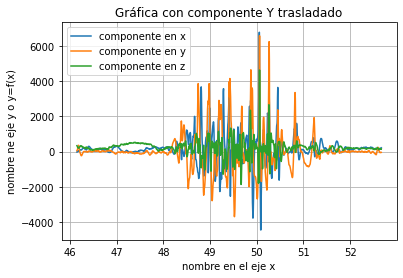

In [ ]:
plt.plot(x_b,b[0],x_b,yp,x_b,b[2])#,b[1].transpose,b[2].transpose)
plt.legend(["componente en x","componente en y", "componente en z"])

plt.grid(True)
plt.xlabel("nombre en el eje x")
plt.ylabel("nombre ne eje y o y=f(x)")
plt.title("Gráfica con componente Y trasladado")
plt.show()

**Observación:** El código de siguiente es para  obtener un data frame con cuatro columnas, una en la componente en x, y, z y **el vector de aceleración**.

In [ ]:
prm_p=np.mean(prueba_arr[:,1])
prm_p


0.984034153517964

In [ ]:
yp_d=prueba_arr[:,1]-prm_p
yp_d

array([ 0.04816585,  0.06006585,  0.09946585, ..., -0.05056415,
       -0.05450415, -0.05056415])

In [ ]:
va_p=np.sqrt(prueba_arr[:,0]**2+yp_d**2+prueba_arr[:,2]**2)
va_p

array([0.33889051, 0.31464237, 0.29628862, ..., 0.23917744, 0.26078177,
       0.26665674])

Data Frame de prueba

In [ ]:
dic_prueba={"X":prueba_arr[:,0],"Y":yp_d,"Z":prueba_arr[:,2],"Vect. Ace.":va_p}
dic_prueba

{'X': array([-0.027146, -0.026347, -0.017418, ...,  0.19234 ,  0.19543 ,
         0.21184 ]),
 'Y': array([ 0.04816585,  0.06006585,  0.09946585, ..., -0.05056415,
        -0.05450415, -0.05056415]),
 'Z': array([0.33435, 0.30773, 0.27855, ..., 0.13287, 0.16384, 0.15386]),
 'Vect. Ace.': array([0.33889051, 0.31464237, 0.29628862, ..., 0.23917744, 0.26078177,
        0.26665674])}

DataFrame del que se obtendrán las características.

In [ ]:
df_prueba=pd.DataFrame(dic_prueba)
df_prueba

,X,Y,Z,Vect. Ace.
0,-0.027146,0.048166,0.33435,0.338891
1,-0.026347,0.060066,0.30773,0.314642
2,-0.017418,0.099466,0.27855,0.296289
3,-0.008152,0.154766,0.23818,0.284163
4,0.004662,0.221966,0.21375,0.308188
...,...,...,...,...
1331,0.168010,-0.058454,0.13821,0.225269
1332,0.184310,-0.058454,0.13199,0.234112
1333,0.192340,-0.050564,0.13287,0.239177
1334,0.195430,-0.054504,0.16384,0.260782


In [ ]:
imputer_p = SimpleImputer(missing_values=np.nan, strategy="mean") #Para corregir NaN´s del vector de aceleración
imputer_p = imputer_p.fit(df_prueba[["Vect. Ace."]])
df_prueba["Vect. Ace."]=imputer_p.transform(df_prueba[["Vect. Ace."]])

Extracción de las 60 características

In [ ]:
carac_prueba = tsfel.time_series_features_extractor(cfg, df_prueba)
carac_prueba

*** Feature extraction started ***
60


<ipython-input-22-da7cdf85a1e4>:1: UserWarning: Using default sampling frequency set in configuration file.
  carac_prueba = tsfel.time_series_features_extractor(cfg, df_prueba)



*** Feature extraction finished ***


,0_Absolute energy,0_Area under the curve,0_Autocorrelation,0_Centroid,0_ECDF Percentile Count_0,0_ECDF Percentile Count_1,0_ECDF Percentile_0,0_ECDF Percentile_1,0_ECDF_0,0_ECDF_1,...,3_Wavelet variance_0,3_Wavelet variance_1,3_Wavelet variance_2,3_Wavelet variance_3,3_Wavelet variance_4,3_Wavelet variance_5,3_Wavelet variance_6,3_Wavelet variance_7,3_Wavelet variance_8,3_Zero crossing rate
0,900.976452,6.043215,900.976452,7.228443,267.0,1068.0,-0.038027,0.42439,0.000749,0.001497,...,0.154701,0.743857,1.219135,1.57729,1.879151,2.208899,2.602667,3.01386,3.358975,0.0


In [ ]:
#Obtenemos la etiqueta
basename_p = os.path.basename(ruta_prueba)
label_p = basename_p.split("_")[2]
label_p, _  = os.path.splitext(label_p)
label_p #obtenemos la etiqueta de verdad o mentira

'MR'

###Generalización


In [ ]:
def get_caract(file_name,i):
  arch = pd.read_csv(file_name,names=["x","y","z","time"])
  array_arch = arch.values

  #Creamos un DataFrame con la componente en Y desplazada y que contenga el vector de aceleración.
  prm = np.mean(array_arch[:,1]).astype('float')#Obtenemos el promedio de la comlumna en Y
  yd = array_arch[:,1]-prm #Desplazamos Y
  va = np.sqrt(array_arch[:,0]**2 + yd**2 + array_arch[:,2]**2) #Vector de aceleración
  dic = {"X": array_arch[:,0], "Y": yd, "Z": array_arch[:,2], "Vect. Ace.": va} #diccionario para df con Y desplazado y vector de aceleración
  df_arch = pd.DataFrame(dic) #df preprocesado

  #Corregimos posibles NaN´s del vector de acelearación:
  imputer = SimpleImputer(missing_values=np.nan, strategy="mean") #sustituimos los NaN´s por la media de la fila
  imputer = imputer.fit(df_arch[["Vect. Ace."]])
  df_arch["Vect. Ace."] = imputer.transform(df_arch[["Vect. Ace."]])

  #Obtenemos las características del DataFrame
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado
  carac.index = [i] #Lo ubicamos con el índice i

  return carac

In [ ]:
def load_data(ospath):
  features=pd.DataFrame()# Data frame vacío
  etiqueta=["Etiqueta"]
  letras=[]
  i=0
  for file in glob(ospath):
    print(file)

    #obtenemos las eiquetas:
    base_name = os.path.basename(file)
    individual_label = base_name.split("_")[2]
    individual_label, _ = os.path.splitext(individual_label)

    #Obtenemos las características:
    features_df = get_caract(file,i)
    features = pd.concat([features, features_df])
    letras.append(individual_label)
    i+=1

  DFE = pd.DataFrame(letras,columns=etiqueta) #Data frame de las etiquetas
  return features,DFE


In [ ]:
Caract, Etiq = load_data("/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/*/*.csv")


/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Jhon Doe/Folder_file022_LD.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Jhon Doe/Folder_file029_OT.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Jhon Doe/Folder_file002_MR.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Jhon Doe/Folder_file039_OT.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Jhon Doe/Folder_file038_OT.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Jhon Doe/Folder_file040_OT.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Jhon Doe/Folder_file028_OT.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Jhon Doe/Folder_file030_OT.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Jhon Doe/Folder_file024_LD.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Jhon Doe/Folder_file021_LD.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Jhon Doe/Folder_file013_MJ.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Jhon Doe/Folder_file018_MJ.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Jhon Doe/Folder_file036_OT.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Jhon Doe/Folder_file025_LD.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Jhon Doe/Folder_file037_OT.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Jhon Doe/Folder_file001_MR.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Jhon Doe/Folder_file033_OT.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Jhon Doe/Folder_file005_MR.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Jhon Doe/Folder_file034_OT.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Jhon Doe/Folder_file020_MJ.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Jhon Doe/Folder_file007_MW.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Jhon Doe/Folder_file017_MJ.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Jhon Doe/Folder_file019_MJ.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Jhon Doe/Folder_file010_MW.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Jhon Doe/Folder_file015_MJ.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Jhon Doe/Folder_file023_LD.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Jhon Doe/Folder_file006_MW.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Jhon Doe/Folder_file003_MR.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Jhon Doe/Folder_file027_OT.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Jhon Doe/Folder_file004_MR.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Jhon Doe/Folder_file009_MW.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Jhon Doe/Folder_file032_OT.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Jhon Doe/Folder_file035_OT.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Jhon Doe/Folder_file014_MJ.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Jhon Doe/Folder_file016_MJ.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Jhon Doe/Folder_file012_MJ.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Jhon Doe/Folder_file026_OT.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Jhon Doe/Folder_file011_MJ.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Jhon Doe/Folder_file031_OT.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Jhon Doe/Folder_file008_MW.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Vicente Fernández/Folder_file127_WD.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Vicente Fernández/Folder_file140_MW.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Vicente Fernández/Folder_file143_FB.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Vicente Fernández/Folder_file141_MW.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Vicente Fernández/Folder_file128_WD.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Vicente Fernández/Folder_file122_MR.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Vicente Fernández/Folder_file132_WU.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Vicente Fernández/Folder_file121_MR.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Vicente Fernández/Folder_file138_MW.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Vicente Fernández/Folder_file135_WU.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Vicente Fernández/Folder_file124_MR.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Vicente Fernández/Folder_file144_FB.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Vicente Fernández/Folder_file125_WD.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Vicente Fernández/Folder_file149_FF.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Vicente Fernández/Folder_file133_WU.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Vicente Fernández/Folder_file156_FS.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Vicente Fernández/Folder_file130_WD.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Vicente Fernández/Folder_file147_FF.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Vicente Fernández/Folder_file120_MR.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Vicente Fernández/Folder_file145_FB.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Vicente Fernández/Folder_file142_FB.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Vicente Fernández/Folder_file131_WU.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Vicente Fernández/Folder_file137_MW.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Vicente Fernández/Folder_file126_WD.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Vicente Fernández/Folder_file136_WU.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Vicente Fernández/Folder_file148_FF.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Vicente Fernández/Folder_file146_FB.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Vicente Fernández/Folder_file154_FS.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Vicente Fernández/Folder_file152_FS.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Vicente Fernández/Folder_file129_WD.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Vicente Fernández/Folder_file153_FS.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Vicente Fernández/Folder_file150_FF.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Vicente Fernández/Folder_file123_MR.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Vicente Fernández/Folder_file151_FF.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Vicente Fernández/Folder_file134_WU.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Vicente Fernández/Folder_file155_FS.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Vicente Fernández/Folder_file139_MW.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Saint Seiya/Folder_file062_MW.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Saint Seiya/Folder_file064_MW.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Saint Seiya/Folder_file056_WU.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Saint Seiya/Folder_file049_WD.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Saint Seiya/Folder_file058_WU.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Saint Seiya/Folder_file071_FF.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Saint Seiya/Folder_file077_FS.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Saint Seiya/Folder_file054_WU.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Saint Seiya/Folder_file079_FS.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Saint Seiya/Folder_file078_FS.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Saint Seiya/Folder_file057_WU.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Saint Seiya/Folder_file076_FS.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Saint Seiya/Folder_file068_FB.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Saint Seiya/Folder_file060_MW.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Saint Seiya/Folder_file065_FB.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Saint Seiya/Folder_file041_MR.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Saint Seiya/Folder_file044_MR.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Saint Seiya/Folder_file069_FB.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Saint Seiya/Folder_file075_FS.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Saint Seiya/Folder_file059_WU.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Saint Seiya/Folder_file046_WD.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Saint Seiya/Folder_file067_FB.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Saint Seiya/Folder_file052_WD.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Saint Seiya/Folder_file070_FF.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Saint Seiya/Folder_file074_FF.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Saint Seiya/Folder_file042_MR.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Saint Seiya/Folder_file048_WD.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Saint Seiya/Folder_file055_WU.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Saint Seiya/Folder_file051_WD.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Saint Seiya/Folder_file063_MW.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Saint Seiya/Folder_file050_WD.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Saint Seiya/Folder_file072_FF.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Saint Seiya/Folder_file043_MR.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Saint Seiya/Folder_file066_FB.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Saint Seiya/Folder_file047_WD.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Saint Seiya/Folder_file053_WU.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Saint Seiya/Folder_file045_MR.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Saint Seiya/Folder_file073_FF.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Saint Seiya/Folder_file061_MW.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Johan Strauss/Folder_file083_MR.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Johan Strauss/Folder_file091_MJ.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Johan Strauss/Folder_file098_MJ.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Johan Strauss/Folder_file108_OT.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Johan Strauss/Folder_file094_MJ.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Johan Strauss/Folder_file090_MJ.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Johan Strauss/Folder_file084_MR.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Johan Strauss/Folder_file082_MR.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Johan Strauss/Folder_file116_OT.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Johan Strauss/Folder_file103_LD.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Johan Strauss/Folder_file109_OT.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Johan Strauss/Folder_file114_OT.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Johan Strauss/Folder_file093_MJ.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Johan Strauss/Folder_file117_OT.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Johan Strauss/Folder_file105_OT.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Johan Strauss/Folder_file092_MJ.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Johan Strauss/Folder_file113_OT.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Johan Strauss/Folder_file080_MR.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Johan Strauss/Folder_file089_MW.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Johan Strauss/Folder_file081_MR.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Johan Strauss/Folder_file087_MW.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Johan Strauss/Folder_file102_LD.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Johan Strauss/Folder_file101_LD.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Johan Strauss/Folder_file107_OT.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Johan Strauss/Folder_file096_MJ.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Johan Strauss/Folder_file086_MW.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Johan Strauss/Folder_file104_LD.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Johan Strauss/Folder_file112_OT.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Johan Strauss/Folder_file085_MW.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Johan Strauss/Folder_file095_MJ.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Johan Strauss/Folder_file110_OT.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Johan Strauss/Folder_file088_MW.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Johan Strauss/Folder_file119_OT.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Johan Strauss/Folder_file115_OT.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Johan Strauss/Folder_file106_OT.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Johan Strauss/Folder_file118_OT.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Johan Strauss/Folder_file100_LD.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Johan Strauss/Folder_file099_MJ.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Johan Strauss/Folder_file111_OT.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Inerciales_por_carpeta/Johan Strauss/Folder_file097_MJ.csv
*** Feature extraction started ***
60


<ipython-input-24-e31ce04631cc>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch) #Extraemos características, cfg debe estar importado



*** Feature extraction finished ***


In [ ]:
Caract

,0_Absolute energy,0_Area under the curve,0_Autocorrelation,0_Centroid,0_ECDF Percentile Count_0,0_ECDF Percentile Count_1,0_ECDF Percentile_0,0_ECDF Percentile_1,0_ECDF_0,0_ECDF_1,...,3_Wavelet variance_0,3_Wavelet variance_1,3_Wavelet variance_2,3_Wavelet variance_3,3_Wavelet variance_4,3_Wavelet variance_5,3_Wavelet variance_6,3_Wavelet variance_7,3_Wavelet variance_8,3_Zero crossing rate
0,444.510265,5.968133,444.510265,9.070960,252.0,1008.0,-0.814280,0.188310,0.000794,0.001587,...,0.006375,0.049518,0.179855,0.375400,0.557141,0.691789,0.787198,0.860086,0.920300,0.0
1,581.626878,6.966498,581.626878,3.291109,254.0,1017.0,-0.955940,0.114000,0.000786,0.001572,...,0.001170,0.008803,0.022291,0.035336,0.044777,0.051455,0.057409,0.063651,0.070156,0.0
2,709.400737,6.510535,709.400737,7.999659,334.0,1339.0,0.090283,0.352880,0.000597,0.001195,...,0.084300,0.416679,0.973080,1.592517,2.086085,2.484920,2.838805,3.129494,3.319133,0.0
3,43.233331,1.735065,43.233331,3.455106,192.0,771.0,-0.006092,0.225140,0.001037,0.002075,...,0.000771,0.005725,0.012309,0.016834,0.020810,0.025876,0.032240,0.039758,0.048287,0.0
4,154.589198,4.187958,154.589198,4.905145,241.0,964.0,-0.419700,0.309130,0.000830,0.001660,...,0.000319,0.001349,0.003564,0.007193,0.011399,0.015284,0.018449,0.021084,0.023650,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,71.301973,1.543310,71.301973,1.341251,138.0,553.0,-0.578220,-0.006566,0.001445,0.002890,...,0.000743,0.003348,0.009881,0.020422,0.032740,0.043711,0.051768,0.057501,0.062420,0.0
152,658.807352,7.316849,658.807352,8.912520,252.0,1008.0,-0.968080,-0.064718,0.000793,0.001586,...,0.004021,0.031025,0.083220,0.146240,0.205531,0.256705,0.301560,0.342867,0.381673,0.0
153,55.759166,1.402875,55.759166,5.074596,172.0,688.0,-0.151600,0.128330,0.001161,0.002323,...,0.012329,0.100052,0.289448,0.470958,0.616014,0.769278,0.953225,1.152082,1.342354,0.0
154,53.715497,1.380622,53.715497,4.937133,135.0,543.0,-0.406660,0.109910,0.001473,0.002946,...,0.006342,0.052226,0.132649,0.212299,0.271834,0.328274,0.391879,0.460849,0.532175,0.0


Las **etiquetas** representan lo siguiente:
- MW - actividades que involucran caminar.
- MR - actividades que involucran correr.
- MJ - actividades que involucran saltar.
- WD - actividades que involucran bajar escaleras.
- WU - actividades que involucran subir escaleras.
- FF - actividades que involucran caer de frente.
- FS - actividades que involucran caer de lateral.
- FB - actividades que involucran caer de espalda.
- LD - actividades que involucran estando acostado.
- OT - Otras. Actividades que involucran estar sentado, parado o levantarse de una posición acostada.

Para entender que involucran FF, FS y FB puede ver el link: https://www.researchgate.net/figure/Fall-patterns-performed-by-the-ten-subjects_fig1_323079154

In [ ]:
Etiq

,Etiqueta
0,LD
1,OT
2,MR
3,OT
4,OT
...,...
151,OT
152,LD
153,MJ
154,OT


In [ ]:
YD = Etiq.values.flatten().tolist()


In [ ]:
#Corregimos posibles NaN´s del arreglo df de características
imputer_Caract = SimpleImputer(missing_values=np.nan, strategy="mean") #sustituimos los NaN´s por la media de la fila
imputer_Caract = imputer_Caract.fit(Caract)
Caract = imputer_Caract.transform(Caract) #Arreglo numpy sin NaN´s

In [ ]:
XD = Caract

###Modelación


In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(XD, YD, test_size = 0.2 , random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc_X = StandardScaler() #Escalado de Variables
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

###Naive Bayes BY

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
NB = GaussianNB()
NB.fit(X_train,Y_train)

GaussianNB()

In [ ]:
NB_predict = NB.predict(X_test)

0.75
              precision    recall  f1-score   support

          FB       1.00      0.67      0.80         3
          FF       1.00      1.00      1.00         1
          FS       0.67      1.00      0.80         2
          LD       1.00      0.33      0.50         3
          MJ       0.86      0.86      0.86         7
          MR       0.25      1.00      0.40         1
          MW       1.00      0.75      0.86         4
          OT       0.67      1.00      0.80         4
          WD       0.80      0.80      0.80         5
          WU       0.00      0.00      0.00         2

    accuracy                           0.75        32
   macro avg       0.72      0.74      0.68        32
weighted avg       0.79      0.75      0.74        32

Conf. Matrix NB
[[2 0 1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 2 0 0]
 [0 0 0 0 6 1 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 3 0 0 0]
 [0 0 0 0 0 0 0 4 0 0]
 [0 0 0 0 0 1 0 0 4 0]
 [0 0 0 0 0 1

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


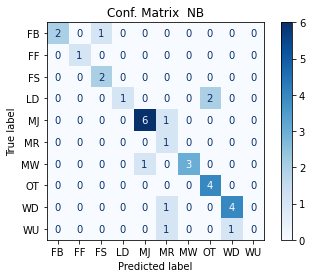

In [ ]:
print(accuracy_score(Y_test,y_pred=NB_predict))
print(classification_report(Y_test, NB_predict))

disp = ConfusionMatrixDisplay.from_estimator(
        NB,
        X_test,
        Y_test,
        cmap=plt.cm.Blues
    )
disp.ax_.set_title("Conf. Matrix  NB")

print("Conf. Matrix NB")
print(disp.confusion_matrix)


### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier_kn = KNeighborsClassifier(n_neighbors=15, metric = "minkowski", p=2)

In [ ]:
classifier_kn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=15)

In [ ]:
KNN_pred = classifier_kn.predict(X_test)

0.59375
              precision    recall  f1-score   support

          FB       0.50      0.33      0.40         3
          FF       0.00      0.00      0.00         1
          FS       1.00      0.50      0.67         2
          LD       0.00      0.00      0.00         3
          MJ       1.00      0.71      0.83         7
          MR       0.50      1.00      0.67         1
          MW       0.67      1.00      0.80         4
          OT       0.57      1.00      0.73         4
          WD       1.00      0.20      0.33         5
          WU       0.33      1.00      0.50         2

    accuracy                           0.59        32
   macro avg       0.56      0.57      0.49        32
weighted avg       0.68      0.59      0.56        32



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Conf. Matrix KNN
[[1 0 0 2 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 3 0 0]
 [0 0 0 0 5 1 1 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 4 0 0 0]
 [0 0 0 0 0 0 0 4 0 0]
 [0 0 0 0 0 0 0 0 1 4]
 [0 0 0 0 0 0 0 0 0 2]]


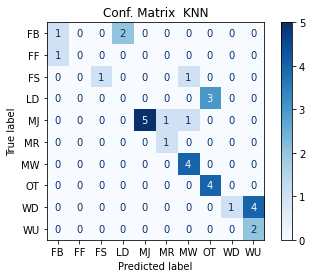

In [ ]:
print(accuracy_score(Y_test,y_pred=KNN_pred))
print(classification_report(Y_test, KNN_pred))

disp = ConfusionMatrixDisplay.from_estimator(
        classifier_kn,
        X_test,
        Y_test,
        cmap=plt.cm.Blues
    )
disp.ax_.set_title("Conf. Matrix  KNN")

print("Conf. Matrix KNN")
print(disp.confusion_matrix)


###Random Forest RF

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators = 20, criterion="entropy", random_state= 0)


In [ ]:
classifier_rf.fit(X_train, Y_train)


RandomForestClassifier(criterion='entropy', n_estimators=20, random_state=0)

In [ ]:
rf_predictions = classifier_rf.predict(X_test)

0.8125
              precision    recall  f1-score   support

          FB       0.60      1.00      0.75         3
          FF       0.00      0.00      0.00         1
          FS       1.00      0.50      0.67         2
          LD       1.00      0.33      0.50         3
          MJ       1.00      1.00      1.00         7
          MR       0.50      1.00      0.67         1
          MW       1.00      0.75      0.86         4
          OT       0.67      1.00      0.80         4
          WD       1.00      0.80      0.89         5
          WU       0.67      1.00      0.80         2

    accuracy                           0.81        32
   macro avg       0.74      0.74      0.69        32
weighted avg       0.85      0.81      0.79        32

Conf. Matrix RF
[[3 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 2 0 0]
 [0 0 0 0 7 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 1 3 0 0 0]
 [0 0 0 0 0 0 0 4 0 0]
 [0 0 0 0 0 0 0 0 4 1]
 [0 0 0 0 0

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


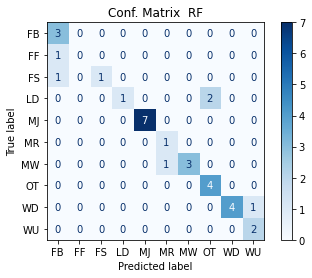

In [ ]:
print(accuracy_score(Y_test,y_pred=  rf_predictions))
print(classification_report(Y_test, rf_predictions))

disp = ConfusionMatrixDisplay.from_estimator(
        classifier_rf,
        X_test,
        Y_test,
        cmap=plt.cm.Blues
    )
disp.ax_.set_title("Conf. Matrix  RF")

print("Conf. Matrix RF")
print(disp.confusion_matrix)


###Decision Tree Clasifier DTC

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
DTC = DecisionTreeClassifier(criterion="entropy", random_state=0)
DTC.fit(X_train,Y_train)


DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
DTC_predict= DTC.predict(X_test)

0.71875
              precision    recall  f1-score   support

          FB       0.00      0.00      0.00         3
          FF       0.50      1.00      0.67         1
          FS       0.50      0.50      0.50         2
          LD       0.60      1.00      0.75         3
          MJ       1.00      0.71      0.83         7
          MR       0.33      1.00      0.50         1
          MW       0.75      0.75      0.75         4
          OT       1.00      1.00      1.00         4
          WD       1.00      0.60      0.75         5
          WU       0.50      1.00      0.67         2

    accuracy                           0.72        32
   macro avg       0.62      0.76      0.64        32
weighted avg       0.74      0.72      0.70        32

Conf. Matrix DTC
[[0 0 1 2 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0 0]
 [0 0 0 0 5 1 1 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 1 3 0 0 0]
 [0 0 0 0 0 0 0 4 0 0]
 [0 0 0 0 0 0 0 0 3 2]
 [0 0 0 0

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


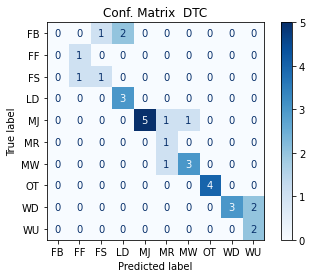

In [ ]:
print(accuracy_score(Y_test,y_pred=DTC_predict))
print(classification_report(Y_test, DTC_predict))
#print(confusion_matrix(Y_test, DTC_predict) )
disp = ConfusionMatrixDisplay.from_estimator(
        DTC,
        X_test,
        Y_test,
        cmap=plt.cm.Blues
    )
disp.ax_.set_title("Conf. Matrix  DTC")

print("Conf. Matrix DTC")
print(disp.confusion_matrix)


###Modelos Re-entrenados

In [ ]:
XD = sc_X.fit_transform(XD) #Reescalado de todos los datos


Naive Bayes NB

In [ ]:
NB_re = GaussianNB()
NB_re.fit(XD,YD)

GaussianNB()

KNN

In [ ]:
KNN_re = classifier_kn = KNeighborsClassifier(n_neighbors=15, metric = "minkowski", p=2)
KNN_re.fit(XD, YD)

KNeighborsClassifier(n_neighbors=15)

DTC

In [ ]:
DTC_re = DecisionTreeClassifier(criterion="entropy", random_state=0)
DTC_re.fit(XD,YD)


DecisionTreeClassifier(criterion='entropy', random_state=0)

RF

In [ ]:
RF_re = RandomForestClassifier(n_estimators = 20, criterion="entropy", random_state= 0)
RF_re.fit(XD, YD)

RandomForestClassifier(criterion='entropy', n_estimators=20, random_state=0)

# Testeo de datos externos

Modificamos ligeramente las funciones, ya que los nombres de los archivos csv de test así como las cabeceras de las columnas sí se encuentran.

In [ ]:
def get_caract_p(file_name,i):
  arch = pd.read_csv(file_name) #Existen los heads en las columnas
  array_arch = arch.values

  #Creamos un DataFrame con la componente en Y desplazada y que contenga el vector de aceleración.
  prm = np.mean(array_arch[:,1]).astype('float')
  yd = array_arch[:,1]-prm
  va = np.sqrt(array_arch[:,0]**2 + yd**2 + array_arch[:,2]**2)
  dic = {"X": array_arch[:,0], "Y": yd, "Z": array_arch[:,2], "Vect. Ace.": va}
  df_arch = pd.DataFrame(dic)

  #Corregimos posibles NaN´s del vector de acelearación:
  imputer = SimpleImputer(missing_values=np.nan, strategy="mean") #sustituimos los NaN´s por la media de la fila
  imputer = imputer.fit(df_arch[["Vect. Ace."]])
  df_arch["Vect. Ace."] = imputer.transform(df_arch[["Vect. Ace."]])

  #Obtenemos las características del DataFrame
  carac = tsfel.time_series_features_extractor(cfg, df_arch)
  carac.index = [i]

  return carac

In [ ]:
def load_data_test(ospath):
  features=pd.DataFrame()# Data frame vacío
  etiqueta=["Etiqueta"]
  letras=[]
  i=0
  for file in glob(ospath):
    print(file)

    #obtenemos las eiquetas:
    individual_label= os.path.splitext(os.path.basename(file))[0] #Cambia la etiqueta y así la línea

    #Obtenemos las características:
    features_df = get_caract_p(file,i)
    features = pd.concat([features, features_df])
    letras.append(individual_label)
    i+=1

  DFE = pd.DataFrame(letras,columns=etiqueta)
  return features,DFE


In [ ]:
Caract_t, Etiq_t = load_data_test('/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Test/Test/*.csv')


/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Test/Test/file_18.csv
*** Feature extraction started ***
60


<ipython-input-58-f9956fd2d883>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch)



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Test/Test/file_5.csv
*** Feature extraction started ***
60


<ipython-input-58-f9956fd2d883>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch)



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Test/Test/file_20.csv
*** Feature extraction started ***
60


<ipython-input-58-f9956fd2d883>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch)



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Test/Test/file_29.csv
*** Feature extraction started ***
60


<ipython-input-58-f9956fd2d883>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch)



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Test/Test/file_4.csv
*** Feature extraction started ***
60


<ipython-input-58-f9956fd2d883>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch)



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Test/Test/file_26.csv
*** Feature extraction started ***
60


<ipython-input-58-f9956fd2d883>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch)



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Test/Test/file_15.csv
*** Feature extraction started ***
60


<ipython-input-58-f9956fd2d883>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch)



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Test/Test/file_14.csv
*** Feature extraction started ***
60


<ipython-input-58-f9956fd2d883>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch)



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Test/Test/file_0.csv
*** Feature extraction started ***
60


<ipython-input-58-f9956fd2d883>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch)



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Test/Test/file_33.csv
*** Feature extraction started ***
60


<ipython-input-58-f9956fd2d883>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch)



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Test/Test/file_7.csv
*** Feature extraction started ***
60


<ipython-input-58-f9956fd2d883>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch)



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Test/Test/file_21.csv
*** Feature extraction started ***
60


<ipython-input-58-f9956fd2d883>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch)



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Test/Test/file_28.csv
*** Feature extraction started ***
60


<ipython-input-58-f9956fd2d883>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch)



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Test/Test/file_34.csv
*** Feature extraction started ***
60


<ipython-input-58-f9956fd2d883>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch)



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Test/Test/file_11.csv
*** Feature extraction started ***
60


<ipython-input-58-f9956fd2d883>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch)



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Test/Test/file_27.csv
*** Feature extraction started ***
60


<ipython-input-58-f9956fd2d883>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch)



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Test/Test/file_9.csv
*** Feature extraction started ***
60


<ipython-input-58-f9956fd2d883>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch)



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Test/Test/file_13.csv
*** Feature extraction started ***
60


<ipython-input-58-f9956fd2d883>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch)



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Test/Test/file_17.csv
*** Feature extraction started ***
60


<ipython-input-58-f9956fd2d883>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch)



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Test/Test/file_6.csv
*** Feature extraction started ***
60


<ipython-input-58-f9956fd2d883>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch)



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Test/Test/file_12.csv
*** Feature extraction started ***
60


<ipython-input-58-f9956fd2d883>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch)



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Test/Test/file_32.csv
*** Feature extraction started ***
60


<ipython-input-58-f9956fd2d883>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch)



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Test/Test/file_31.csv
*** Feature extraction started ***
60


<ipython-input-58-f9956fd2d883>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch)



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Test/Test/file_3.csv
*** Feature extraction started ***
60


<ipython-input-58-f9956fd2d883>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch)



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Test/Test/file_19.csv
*** Feature extraction started ***
60


<ipython-input-58-f9956fd2d883>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch)



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Test/Test/file_16.csv
*** Feature extraction started ***
60


<ipython-input-58-f9956fd2d883>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch)



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Test/Test/file_30.csv
*** Feature extraction started ***
60


<ipython-input-58-f9956fd2d883>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch)



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Test/Test/file_25.csv
*** Feature extraction started ***
60


<ipython-input-58-f9956fd2d883>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch)



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Test/Test/file_24.csv
*** Feature extraction started ***
60


<ipython-input-58-f9956fd2d883>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch)



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Test/Test/file_8.csv
*** Feature extraction started ***
60


<ipython-input-58-f9956fd2d883>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch)



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Test/Test/file_2.csv
*** Feature extraction started ***
60


<ipython-input-58-f9956fd2d883>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch)



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Test/Test/file_10.csv
*** Feature extraction started ***
60


<ipython-input-58-f9956fd2d883>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch)



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Test/Test/file_22.csv
*** Feature extraction started ***
60


<ipython-input-58-f9956fd2d883>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch)



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Test/Test/file_1.csv
*** Feature extraction started ***
60


<ipython-input-58-f9956fd2d883>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch)



*** Feature extraction finished ***
/content/drive/MyDrive/Tareas CDSI/Archivos inerciales/Test/Test/file_23.csv
*** Feature extraction started ***
60


<ipython-input-58-f9956fd2d883>:18: UserWarning: Using default sampling frequency set in configuration file.
  carac = tsfel.time_series_features_extractor(cfg, df_arch)



*** Feature extraction finished ***


In [ ]:
Caract_t

,0_Absolute energy,0_Area under the curve,0_Autocorrelation,0_Centroid,0_ECDF Percentile Count_0,0_ECDF Percentile Count_1,0_ECDF Percentile_0,0_ECDF Percentile_1,0_ECDF_0,0_ECDF_1,...,3_Wavelet variance_0,3_Wavelet variance_1,3_Wavelet variance_2,3_Wavelet variance_3,3_Wavelet variance_4,3_Wavelet variance_5,3_Wavelet variance_6,3_Wavelet variance_7,3_Wavelet variance_8,3_Zero crossing rate
0,347.102218,4.754841,347.102218,10.721238,400.0,1600.0,-0.162598,0.150330,0.000500,0.001000,...,0.047301,0.244429,0.566319,0.971823,1.394784,1.771973,2.046325,2.188923,2.210693,0.0
1,182.242537,4.157707,182.242537,12.050602,600.0,2400.0,-0.136047,0.076782,0.000333,0.000667,...,0.004106,0.035105,0.095080,0.170210,0.240064,0.299297,0.354675,0.410036,0.465119,0.0
2,136.600043,1.482791,136.600043,4.152497,200.0,800.0,-0.082458,0.008911,0.001000,0.002000,...,0.026132,0.069042,0.150144,0.280167,0.443408,0.633930,0.842917,1.049850,1.231830,0.0
3,63.193702,2.098675,63.193702,11.587317,390.0,1560.0,-0.181274,0.014221,0.000513,0.001026,...,0.002588,0.023279,0.057154,0.092426,0.126162,0.159724,0.196479,0.237108,0.277976,0.0
4,199.665572,2.120628,199.665572,4.534875,180.0,720.0,-0.222656,-0.037354,0.001111,0.002222,...,0.028399,0.161763,0.409405,0.664411,0.869706,1.015591,1.122967,1.218126,1.316657,0.0
5,127.911753,2.667965,127.911753,6.057935,280.0,1120.0,-0.349182,-0.015076,0.000714,0.001429,...,0.008708,0.032623,0.078481,0.130860,0.182720,0.227333,0.260253,0.282473,0.298146,0.0
6,642.828203,6.707832,642.828203,7.648620,240.0,960.0,-0.866516,-0.089355,0.000833,0.001667,...,0.010389,0.107345,0.319610,0.566603,0.778045,0.940258,1.086275,1.246031,1.427360,0.0
7,538.930570,5.251425,538.930570,8.564220,240.0,960.0,-0.052673,0.853638,0.000833,0.001667,...,0.044599,0.182274,0.353754,0.455618,0.568849,0.745992,0.981530,1.254715,1.546416,0.0
8,174.374461,4.136906,174.374461,12.250946,540.0,2160.0,-0.160889,0.088074,0.000370,0.000741,...,0.003521,0.032460,0.094735,0.176458,0.253631,0.317471,0.373462,0.426928,0.479489,0.0
9,181.183586,1.989767,181.183586,5.399271,200.0,800.0,-0.146667,-0.007996,0.001000,0.002000,...,0.030024,0.104665,0.205559,0.352586,0.522047,0.676203,0.794892,0.878063,0.933660,0.0


In [ ]:
Etiq_t

,Etiqueta
0,file_18
1,file_5
2,file_20
3,file_29
4,file_4
5,file_26
6,file_15
7,file_14
8,file_0
9,file_33


In [ ]:
#Corregimos los NaN´s del DataFrame
imputer_Caract_t = SimpleImputer(missing_values=np.nan, strategy="mean") #sustituimos los NaN´s por la media de la fila
imputer_Caract_t = imputer_Caract_t.fit(Caract_t)
Caract_t = imputer_Caract_t.transform(Caract_t) #Arreglo numpy sin NaN´s

In [ ]:
X = Caract_t #Reescalamos
X = sc_X.fit_transform(X)


In [ ]:
Y_Etiq = Etiq_t.values.flatten().tolist() #Nos quedamos con la lista de etiquetas


## Clasificación de los archivos Test
**NOTA:** Todas las siguientes predicciones fueron compartidas en formatos de txt. El responsbale de la práctica junto con el docente son los responsables de comparar estas predicciones con los datos verdaderos, con el fin de observar qué compañero obtuvo el mayos score (el que mejor predijo las clases verdaderas).

NB

In [ ]:
NB_re_predict = NB_re.predict(X)
NB_re_predict

array(['MR', 'MR', 'MR', 'MR', 'MR', 'MR', 'MR', 'MR', 'MR', 'MR', 'MR',
       'MR', 'MR', 'MR', 'MR', 'MR', 'MR', 'MR', 'MR', 'MR', 'MR', 'MR',
       'MR', 'MR', 'MR', 'MR', 'MR', 'MR', 'MR', 'MR', 'MR', 'MR', 'MR',
       'MR', 'MR'], dtype='<U2')

In [ ]:
range(35)

range(0, 35)

In [ ]:
for i in range(35):
  print("El clasificador NB clasifica el archivo", Y_Etiq[i], "como", NB_re_predict[i] )


El clasificador NB clasifica el archivo file_18 como MR
El clasificador NB clasifica el archivo file_5 como MR
El clasificador NB clasifica el archivo file_20 como MR
El clasificador NB clasifica el archivo file_29 como MR
El clasificador NB clasifica el archivo file_4 como MR
El clasificador NB clasifica el archivo file_26 como MR
El clasificador NB clasifica el archivo file_15 como MR
El clasificador NB clasifica el archivo file_14 como MR
El clasificador NB clasifica el archivo file_0 como MR
El clasificador NB clasifica el archivo file_33 como MR
El clasificador NB clasifica el archivo file_7 como MR
El clasificador NB clasifica el archivo file_21 como MR
El clasificador NB clasifica el archivo file_28 como MR
El clasificador NB clasifica el archivo file_34 como MR
El clasificador NB clasifica el archivo file_11 como MR
El clasificador NB clasifica el archivo file_27 como MR
El clasificador NB clasifica el archivo file_9 como MR
El clasificador NB clasifica el archivo file_13 como 

Guardamos las etiquetas de Naive Bayes

In [ ]:
save_nb =[[Y_Etiq[0],NB_re_predict[0]]]
for k in range(1,35):
  save_nb.append([Y_Etiq[k],NB_re_predict[k]])
save_NB = np.array(save_nb)
np.savetxt('Etiquetas Naive Bayes.txt', save_NB,fmt="%s")

KNN

In [ ]:
KNN_re_predict = KNN_re.predict(X)
KNN_re_predict

array(['MR', 'WD', 'MJ', 'MW', 'MJ', 'MW', 'LD', 'MR', 'WD', 'MJ', 'OT',
       'MW', 'MR', 'MR', 'MW', 'MJ', 'OT', 'MW', 'MW', 'LD', 'MW', 'MJ',
       'OT', 'WU', 'OT', 'OT', 'FB', 'LD', 'MW', 'FB', 'MR', 'WU', 'MW',
       'OT', 'LD'], dtype='<U2')

In [ ]:
for i in range(35):
  print("El clasificador KNN clasifica el archivo", Y_Etiq[i], "como", KNN_re_predict[i] )


El clasificador KNN clasifica el archivo file_18 como MR
El clasificador KNN clasifica el archivo file_5 como WD
El clasificador KNN clasifica el archivo file_20 como MJ
El clasificador KNN clasifica el archivo file_29 como MW
El clasificador KNN clasifica el archivo file_4 como MJ
El clasificador KNN clasifica el archivo file_26 como MW
El clasificador KNN clasifica el archivo file_15 como LD
El clasificador KNN clasifica el archivo file_14 como MR
El clasificador KNN clasifica el archivo file_0 como WD
El clasificador KNN clasifica el archivo file_33 como MJ
El clasificador KNN clasifica el archivo file_7 como OT
El clasificador KNN clasifica el archivo file_21 como MW
El clasificador KNN clasifica el archivo file_28 como MR
El clasificador KNN clasifica el archivo file_34 como MR
El clasificador KNN clasifica el archivo file_11 como MW
El clasificador KNN clasifica el archivo file_27 como MJ
El clasificador KNN clasifica el archivo file_9 como OT
El clasificador KNN clasifica el arc

Guardamos las etiquetas de KNN

In [ ]:
save_knn =[[Y_Etiq[0],KNN_re_predict[0]]]
for k in range(1,35):
  save_knn.append([Y_Etiq[k],KNN_re_predict[k]])
save_KNN = np.array(save_knn)
np.savetxt('Etiquetas KNN.txt', save_KNN,fmt="%s")

DTC

In [ ]:
DTC_re_predict = DTC_re.predict(X)
DTC_re_predict


array(['WD', 'WD', 'MJ', 'MW', 'MJ', 'OT', 'FB', 'FF', 'WD', 'MJ', 'OT',
       'OT', 'MR', 'MR', 'MW', 'FS', 'OT', 'MW', 'OT', 'FS', 'MJ', 'MJ',
       'OT', 'WD', 'OT', 'OT', 'FF', 'FB', 'FS', 'FS', 'MR', 'WD', 'OT',
       'OT', 'FS'], dtype='<U2')

In [ ]:
for i in range(35):
  print("El clasificador DTC clasifica el archivo", Y_Etiq[i], "como", DTC_re_predict[i] )


El clasificador DTC clasifica el archivo file_18 como WD
El clasificador DTC clasifica el archivo file_5 como WD
El clasificador DTC clasifica el archivo file_20 como MJ
El clasificador DTC clasifica el archivo file_29 como MW
El clasificador DTC clasifica el archivo file_4 como MJ
El clasificador DTC clasifica el archivo file_26 como OT
El clasificador DTC clasifica el archivo file_15 como FB
El clasificador DTC clasifica el archivo file_14 como FF
El clasificador DTC clasifica el archivo file_0 como WD
El clasificador DTC clasifica el archivo file_33 como MJ
El clasificador DTC clasifica el archivo file_7 como OT
El clasificador DTC clasifica el archivo file_21 como OT
El clasificador DTC clasifica el archivo file_28 como MR
El clasificador DTC clasifica el archivo file_34 como MR
El clasificador DTC clasifica el archivo file_11 como MW
El clasificador DTC clasifica el archivo file_27 como FS
El clasificador DTC clasifica el archivo file_9 como OT
El clasificador DTC clasifica el arc

Guardamos las etiquetas de DTC

In [ ]:
save_dtc =[[Y_Etiq[0],DTC_re_predict[0]]]
for k in range(1,35):
  save_dtc.append([Y_Etiq[k],DTC_re_predict[k]])
save_DTC = np.array(save_dtc)
np.savetxt('Etiquetas DTC.txt', save_DTC,fmt="%s")

RF

In [ ]:
RF_re_predict = RF_re.predict(X)
RF_re_predict

array(['MR', 'WD', 'MJ', 'MW', 'MJ', 'MW', 'FF', 'FS', 'WD', 'MJ', 'OT',
       'MW', 'MR', 'MR', 'MW', 'LD', 'OT', 'MW', 'MW', 'FF', 'MJ', 'MJ',
       'OT', 'WU', 'OT', 'OT', 'FF', 'FF', 'FB', 'FB', 'MR', 'WU', 'OT',
       'OT', 'FS'], dtype='<U2')

In [ ]:
for i in range(35):
  print("El clasificador RF clasifica el archivo", Y_Etiq[i], "como", RF_re_predict[i] )


El clasificador RF clasifica el archivo file_18 como MR
El clasificador RF clasifica el archivo file_5 como WD
El clasificador RF clasifica el archivo file_20 como MJ
El clasificador RF clasifica el archivo file_29 como MW
El clasificador RF clasifica el archivo file_4 como MJ
El clasificador RF clasifica el archivo file_26 como MW
El clasificador RF clasifica el archivo file_15 como FF
El clasificador RF clasifica el archivo file_14 como FS
El clasificador RF clasifica el archivo file_0 como WD
El clasificador RF clasifica el archivo file_33 como MJ
El clasificador RF clasifica el archivo file_7 como OT
El clasificador RF clasifica el archivo file_21 como MW
El clasificador RF clasifica el archivo file_28 como MR
El clasificador RF clasifica el archivo file_34 como MR
El clasificador RF clasifica el archivo file_11 como MW
El clasificador RF clasifica el archivo file_27 como LD
El clasificador RF clasifica el archivo file_9 como OT
El clasificador RF clasifica el archivo file_13 como 

Gaurdamos etiquetas de RF

In [ ]:
save_rf =[[Y_Etiq[0],RF_re_predict[0]]]
for k in range(1,35):
  save_rf.append([Y_Etiq[k],RF_re_predict[k]])
save_RF = np.array(save_rf)
np.savetxt('Etiquetas Random Forest.txt', save_RF,fmt="%s")